Импорты

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import pandas as pd
from statsmodels.stats.multicomp import pairwise_tukeyhsd

Загрузка и работа с датасетом

In [2]:
df = pd.read_csv("data_train.csv")
# Выберите столбец для анализа
# Извлечение данных из столбца
data1 = df["alt"]
data2 = df["ast"]
data3 = df["belok"]

Тесты нормальности распределения for data1 (сделай столько раз, сколько групп данных)

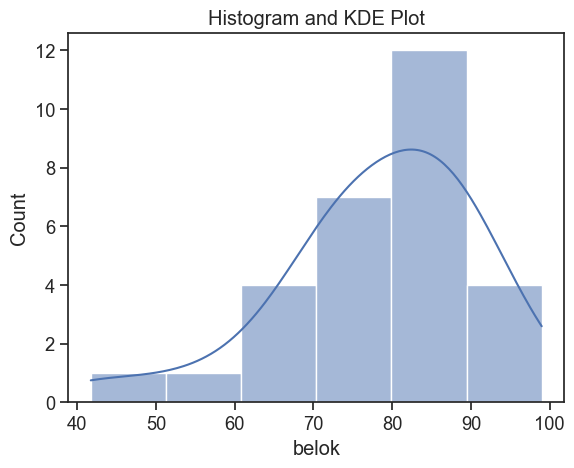

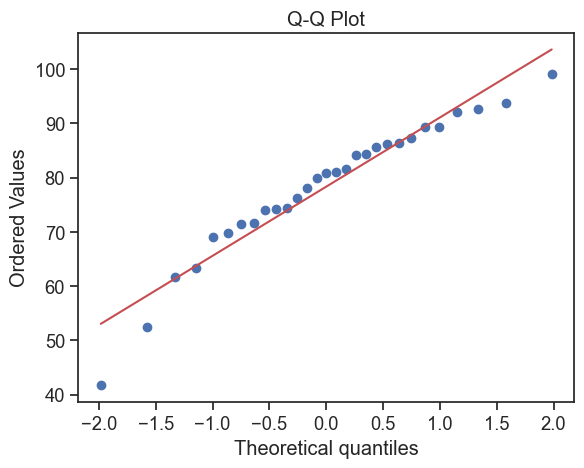

Shapiro-Wilk Test Statistic: 0.943, p-value: 0.119
Распределение норма
_______________________________________
Kolmogorov-Smirnov Test Statistic: 1.0, p-value: 0.0
Распределение не нормальное
_______________________________________
Skewness: -0.957
Excess kurtosis: 0.984
Распределение не нормальное - тебе пизда!
ПАМЯТКА: Если ассиметрия близка к 0, а эксцесс к 3 - то распределение норма, если нет тебе пизда!


In [52]:
def opred_raspr(data):
    # Визуализация распределения
    sns.histplot(data, kde=True)
    plt.title('Histogram and KDE Plot')
    plt.show()
    # Q-Q plot для визуальной оценки нормальности
    stats.probplot(data, dist="norm", plot=plt)
    plt.title('Q-Q Plot')
    plt.show()
    # Проведение теста Шапиро-Уилка на нормальность
    stat, p_value = stats.shapiro(data)
    print(f'Shapiro-Wilk Test Statistic: {round(stat,3)}, p-value: {round(p_value, 3)}')
    if p_value > 0.05:
        print("Распределение норма")
    else:
        print("Распределение не нормальное")
    # Проведение теста Колмогорова-Смирнова на нормальность
    ks_statistic, ks_p_value = stats.kstest(data, 'norm')
    print("_______________________________________")
    print(f'Kolmogorov-Smirnov Test Statistic: {round(ks_statistic, 3)}, p-value: {ks_p_value}')
    if ks_p_value > 0.05:
        print("Распределение норма")
    else:
        print("Распределение не нормальное")
    # Проверка коэффициента асимметрии и эксцесса
    skewness = stats.skew(data)
    kurtosis = stats.kurtosis(data)
    print("_______________________________________")
    print(f'Skewness: {round(skewness,3)}')
    print(f'Excess kurtosis: {round(kurtosis,3)}')
    if abs(skewness) < 0.5 and abs(kurtosis - 3) < 0.5:
        print("Распределение близко к нормальному")
    else:
        print("Распределение не нормальное - тебе пизда!")
    print("ПАМЯТКА: Если ассиметрия близка к 0, а эксцесс к 3 - то распределение норма, если нет тебе пизда!")

opred_raspr(data3)

Статистика по Краскелу-Уолису и ANOVA

In [55]:
def sravnenie_neskolkih_group(data1, data2, data3):
    # Реализация теста Краскела-Уоллиса
    kruskal_stat, kruskal_p_value = stats.kruskal(data1, data2, data3)

    # Реализация теста ANOVA
    anova_stat, anova_p_value = stats.f_oneway(data1, data2, data3)

    # Вывод результатов
    print("Краскел-Уоллис:")
    print(f"Статистика: {round(kruskal_stat, 3)}, p-value: {round(kruskal_p_value,3)}")
    print("\nANOVA:")
    print(f"Статистика: {round(anova_stat, 3)}, p-value: {round(anova_p_value,3)}")

    # Сравнение p-value для принятия решения
    alpha = 0.05
        
    if kruskal_p_value < alpha:
        print("\nГруппы различаются (Краскел-Уоллис)")
    else:
        print("\nГруппы не различаются (Краскел-Уоллис)")

    if anova_p_value < alpha:
        print("Группы различаются (ANOVA)")
    else:
        print("Группы не различаются (ANOVA)")
    if anova_p_value < 0.05:
        df = pd.DataFrame({'Group': ['Group1'] * len(data1) + ['Group2'] * len(data2) + ['Group3'] * len(data3), 'Values': np.concatenate([data1, data2, data3])})
        # Проведение теста Тьюки для множественных сравнений
        tukey_result = pairwise_tukeyhsd(df['Values'], df['Group'])
        print("")
        print("____________________Тест Тьюки______________________")
        print(tukey_result)

sravnenie_neskolkih_group(data1, data2, data3)

Краскел-Уоллис:
Статистика: 67.103, p-value: 0.0

ANOVA:
Статистика: 90.373, p-value: 0.0

Группы различаются (Краскел-Уоллис)
Группы различаются (ANOVA)

____________________Тест Тьюки______________________
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower   upper   reject
----------------------------------------------------
Group1 Group2 -43.2414   0.0 -55.219 -31.2638   True
Group1 Group3  23.2552   0.0 11.2776  35.2327   True
Group2 Group3  66.4966   0.0  54.519  78.4741   True
----------------------------------------------------


Графики

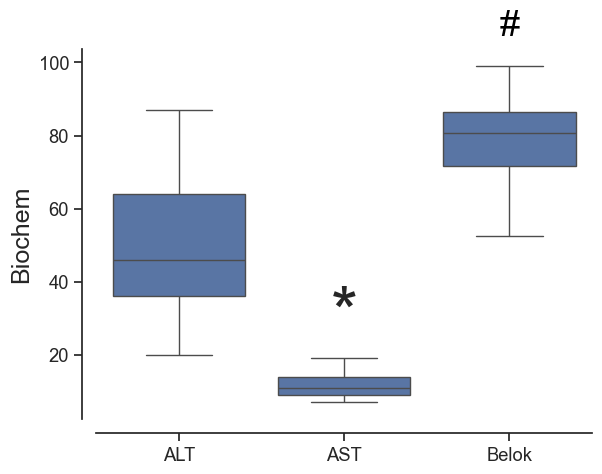

In [47]:

df = pd.DataFrame({'Group': ['ALT'] * len(data1) + ['AST'] * len(data2) + ['Belok'] * len(data3), 'Values': np.concatenate([data1, data2, data3])})
sns.set_theme(style="ticks", palette="deep", context="notebook", font_scale=1.2)# настройка цветовой темы графика
ax= sns.boxplot(x="Group", y="Values", data=df, showfliers=False)# данные для ящиков, надписи под осями
ax.set(xlabel=None)
ax.set_ylabel("Biochem",fontsize=18)
sns.despine(offset=10, trim=False)

plt.text(1, 30, "*", fontsize=50, ha="center", va="center")# Знак достоверности над 2 ящиком
plt.text(2, 110, "#", color='black', fontsize=26, ha='center', va='center')# Знак достоверности над 3 ящиком

plt.show()